# **KNN Classifier**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

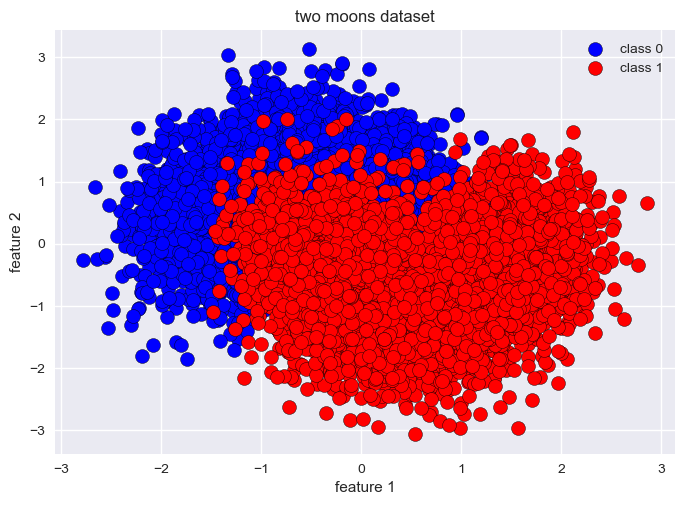

In [2]:
X, y = make_moons(n_samples=10000, noise=0.4)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

plt.style.use('seaborn')
plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1],
             c= "blue", marker= 'o',s=100,edgecolors='black')
plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1],
             c= "red", marker= 'o',s=100,edgecolors='black')

plt.legend(["class 0", "class 1"])
plt.title('two moons dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

**Cross Validation to choose hyperparameter K**

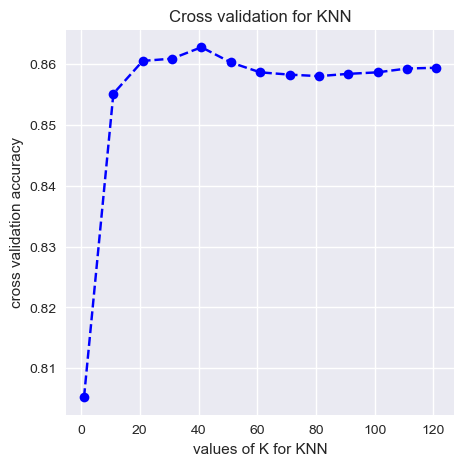

In [3]:
k_range = range(1, 130, 10)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn, x_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.figure(figsize = (5,5))    
plt.plot(k_range, k_scores, 'bo--') 
plt.title('Cross validation for KNN')   
plt.xlabel("values of K for KNN")
plt.ylabel("cross validation accuracy")
plt.show()    

**Accuracy on test data for chosen K**

In [4]:
knnclassifier = KNeighborsClassifier(
    n_neighbors=50, metric='minkowski')
knnclassifier.fit(x_train, y_train)
acc = knnclassifier.score(x_test, y_test)
print("The accuracy on the dataset is", acc)

The accuracy on the dataset is 0.79


**Decision Boundary**

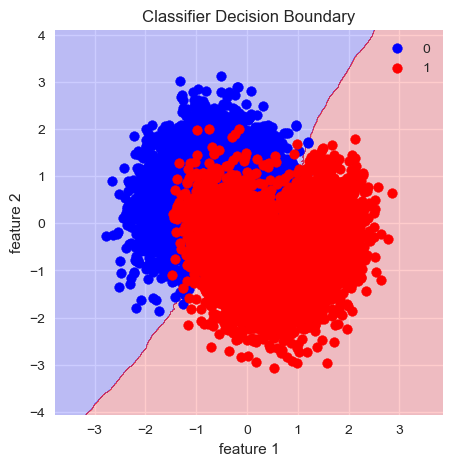

In [8]:
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                                stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (5,5))
plt.contourf(X1, X2, knnclassifier.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(
    X1.shape), alpha = 0.2, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for j in np.unique(y_set):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['blue', 'red'][j], label = j)
plt.title('Classifier Decision Boundary')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

**Compare train, test and validation datas based on accuracy**

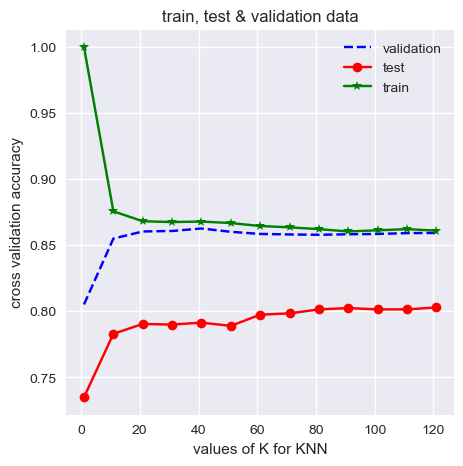

In [6]:
k_scores = []
train_scores = []
test_scores = []

for k in k_range:
    knnclassifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knnclassifier, x_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

    knnclassifier.fit(x_train, y_train)
    acc = knnclassifier.score(x_test, y_test) 
    test_scores.append(acc) 
    acc = knnclassifier.score(x_train, y_train)
    train_scores.append(acc)

plt.figure(figsize = (5,5))
plt.title('train, test & validation data')
plt.plot(k_range, k_scores, 'b--', 
    k_range,test_scores,'ro-',
      k_range,train_scores,'g*-')    
plt.xlabel("values of K for KNN")
plt.ylabel("cross validation accuracy")
plt.legend(['validation', 'test', 'train'])
plt.show()   


**ROC Curve**

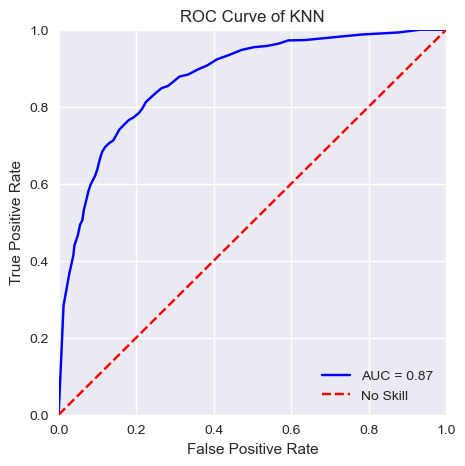

In [7]:
knnclassifier = KNeighborsClassifier(
    n_neighbors=50, metric='minkowski')
knnclassifier.fit(x_train, y_train)

y_scores = knnclassifier.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('ROC Curve of KNN')
plt.plot(fpr, tpr, 'b', label ='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--', label = 'No Skill')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()